# Bibliotecas

In [1]:
%run libs.py

# Ingest Data

In [2]:
df_DAS = pd.read_csv('data/cargodas/cargodas.csv.gz', compression='gzip')
df_DAS.shape

(371789, 16)

# EDA

In [3]:
df_DAS.sample()

,Unnamed: 0,Nome,CPF,Descrição do cargo emprego,Nível de Escolaridade,Situação servidor,Denominação do órgão de atuação,UF da UPAG de vinculação,Denominação unidade organizacional,UF da Residência,Cidade da residência,Data início DAS,DL nomeação,Valor da DAS,Unnamed: 14,unique_id
313729,1691,SUSANE PEREIRA ILHA,***857671**,TECNICO FEDERAL DE FINANCAS E CONTROLE,ENSINO SUPERIOR,ATIVO PERMANENTE,MINISTERIO DA FAZENDA,DF,SUPERINTENDENCIA DE ADMINISTRACAO MF/DF,DF,BRASILIA,20151105,PORTARIA 21/COAF DE 03NOV2015 DOU 05NOV2015,"1480,74",NaN,SUSANE PEREIRA ILHA***857671**


In [4]:
df_DAS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371789 entries, 0 to 371788
Data columns (total 16 columns):
Unnamed: 0                            371789 non-null int64
Nome                                  371789 non-null object
CPF                                   371789 non-null object
Descrição do cargo emprego            141638 non-null object
Nível de Escolaridade                 371788 non-null object
Situação servidor                     371789 non-null object
Denominação do órgão de atuação       371789 non-null object
UF da UPAG de vinculação              371789 non-null object
Denominação unidade organizacional    371789 non-null object
UF da Residência                      371761 non-null object
Cidade da residência                  371789 non-null object
Data início DAS                       371789 non-null int64
DL nomeação                           365888 non-null object
Valor da DAS                          371789 non-null object
Unnamed: 14                          

## Pessoas homônimas

In [5]:
df_DAS['Nome'].value_counts().head()

PAULO PEREIRA DA SILVA         81
LUIZ ANTONIO DA SILVA          66
LUIS CARLOS ALVES              65
ANDRESSA PEREIRA DOS SANTOS    59
JOAO LUIZ DA SILVA             55
Name: Nome, dtype: int64

A única chave única de uma pessoa é o CPF. No caso do nosso DF temos apenas 6 digitos, causando a possibilidade de esses números se repetirem para outras pessoas, como o caso do exemplo abaixo.

In [6]:
df_DAS[df_DAS['Nome'].str.contains("PAULO PEREIRA DA SILVA")].head()

,Unnamed: 0,Nome,CPF,Descrição do cargo emprego,Nível de Escolaridade,Situação servidor,Denominação do órgão de atuação,UF da UPAG de vinculação,Denominação unidade organizacional,UF da Residência,Cidade da residência,Data início DAS,DL nomeação,Valor da DAS,Unnamed: 14,unique_id
5312,5313,PAULO PEREIRA DA SILVA,***067301**,NaN,ENSINO MEDIO,NOMEADO CARGO COMIS.,FUNDACAO NACIONAL DO INDIO,DF,COORD GERAL DE GESTAO DE PESSOAS/DAGES,MS,IGUATEMI,20101013,"DEC 007778/2012, AUT.EXT.: PR PUB: DO 30JUL2012","2701,46",NaN,PAULO PEREIRA DA SILVA***067301**
5441,5442,PAULO PEREIRA DA SILVA,***675331**,NaN,ALFABETIZADO SEM CURSOS REGULARES,NOMEADO CARGO COMIS.,FUNDACAO NACIONAL DO INDIO,DF,COORD GERAL DE GESTAO DE PESSOAS/DAGES,RO,ALTA FLORESTA D'OESTE,20130805,"DEC 007778/2012, AUT.EXT.: PR PUB: DO 30JUL2012","2701,46",NaN,PAULO PEREIRA DA SILVA***675331**
14784,4872,PAULO PEREIRA DA SILVA,***067301**,NaN,ENSINO MEDIO,NOMEADO CARGO COMIS.,FUNDACAO NACIONAL DO INDIO,DF,COORD GERAL DE GESTAO DE PESSOAS/DAGES,MS,IGUATEMI,20101013,"DEC 007778/2012, AUT.EXT.: PR PUB: DO 30JUL2012","2701,46",NaN,PAULO PEREIRA DA SILVA***067301**
14918,5006,PAULO PEREIRA DA SILVA,***675331**,NaN,ALFABETIZADO SEM CURSOS REGULARES,NOMEADO CARGO COMIS.,FUNDACAO NACIONAL DO INDIO,DF,COORD GERAL DE GESTAO DE PESSOAS/DAGES,RO,ALTA FLORESTA DO OESTE,20130805,"DEC 007778/2012, AUT.EXT.: PR PUB: DO 30JUL2012","2701,46",NaN,PAULO PEREIRA DA SILVA***675331**
24977,5719,PAULO PEREIRA DA SILVA,***067301**,NaN,ENSINO MEDIO,NOMEADO CARGO COMIS.,FUNDACAO NACIONAL DO INDIO,DF,COORD GERAL DE GESTAO DE PESSOAS/DAGES,MS,IGUATEMI,20101013,"DEC 007778/2012, AUT.EXT.: PR PUB: DO 30JUL2012","2585,13",NaN,PAULO PEREIRA DA SILVA***067301**


In [7]:
# A única forma de termos uma chave única é comparar o `NOME` mais `CPF`
df_DAS['unique_id'] = df_DAS['Nome'] + " - " + df_DAS['CPF'].str.replace('[\.\-\*]', '',regex=True)

In [8]:
# Quantidade chaves únicas
print("Total de chaves únicas = " + str(df_DAS['unique_id'].nunique()))
df_DAS['unique_id'].value_counts().head()

Total de chaves únicas = 24133


PAULO MAIA DE SOUZA VALENTE - 758404    35
DAIANE DANIELE SANTOS ROCHA - 075906    35
GABRIELA ALVES FERREIRA - 961731        35
JOSE FERREIRA DE BARROS - 814247        35
IVO BARBOSA LEITE - 035598              35
Name: unique_id, dtype: int64

In [9]:
df_DAS.columns

Index(['Unnamed: 0', 'Nome', 'CPF', 'Descrição do cargo emprego',
       'Nível de Escolaridade', 'Situação servidor',
       'Denominação do órgão de atuação', 'UF da UPAG de vinculação',
       'Denominação unidade organizacional', 'UF da Residência',
       'Cidade da residência', 'Data início DAS', 'DL nomeação',
       'Valor da DAS', 'Unnamed: 14', 'unique_id'],
      dtype='object')

In [14]:
# Mais de um registro da mesma pessoa pode ser progressão de carreira.
# Vamos pegar um exemplo para analisar
df_DAS[df_DAS['unique_id']==("MARCELO MONZANI NETTO - 154638")].head(2)

,Unnamed: 0,Nome,CPF,Descrição do cargo emprego,Nível de Escolaridade,Situação servidor,Denominação do órgão de atuação,UF da UPAG de vinculação,Denominação unidade organizacional,UF da Residência,Cidade da residência,Data início DAS,DL nomeação,Valor da DAS,Unnamed: 14,unique_id
7915,7916,MARCELO MONZANI NETTO,***154638**,NaN,MESTRADO,NOMEADO CARGO COMIS.,INSTITUTO BRASILEIRO DE MUSEUS,DF,COORDENACAO DE GESTAO DE PESSOAS,SP,SAO PAULO,20101101,"LEI 011906/2009, AUT.EXT.: PR PUB: DO 21JAN2009","3440,75",NaN,MARCELO MONZANI NETTO - 154638
17226,7314,MARCELO MONZANI NETTO,***154638**,NaN,MESTRADO,NOMEADO CARGO COMIS.,INSTITUTO BRASILEIRO DE MUSEUS,DF,COORDENACAO DE GESTAO DE PESSOAS,SP,SAO PAULO,20101101,"LEI 011906/2009, AUT.EXT.: PR PUB: DO 21JAN2009","3440,75",NaN,MARCELO MONZANI NETTO - 154638


### Atividades

In [11]:
def plot_col(dataframe, col):
    #Graph    
    chart = (dataframe[col].value_counts()).plot(kind='bar', align='center', figsize=(12,5))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title(col)
    #Amounts
    df_col = pd.DataFrame(dataframe[col].value_counts())
    df_col['%'] = (df_col[col]/df_col[col].sum()).round(2)
    return df_col.head()

,Denominação do órgão de atuação,%
MINISTERIO DA FAZENDA,24907,0.07
PRESIDENCIA DA REPUBLICA,23350,0.06
INSTITUTO NACIONAL DE SEGURO SOCIAL,17379,0.05
MINISTERIO DA ECONOMIA,17344,0.05
"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",14646,0.04


/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/matplo

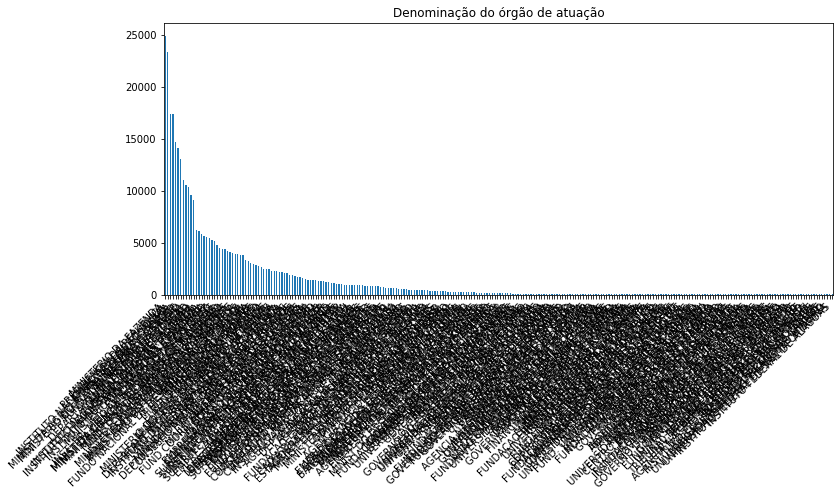

In [12]:
plot_col(df_DAS,'Denominação do órgão de atuação')

,Cidade da residência,%
BRASILIA,198709,0.53
RIO DE JANEIRO,24771,0.07
SAO PAULO,8038,0.02
RECIFE,6610,0.02
BRASÍLIA,5505,0.01


/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/ma

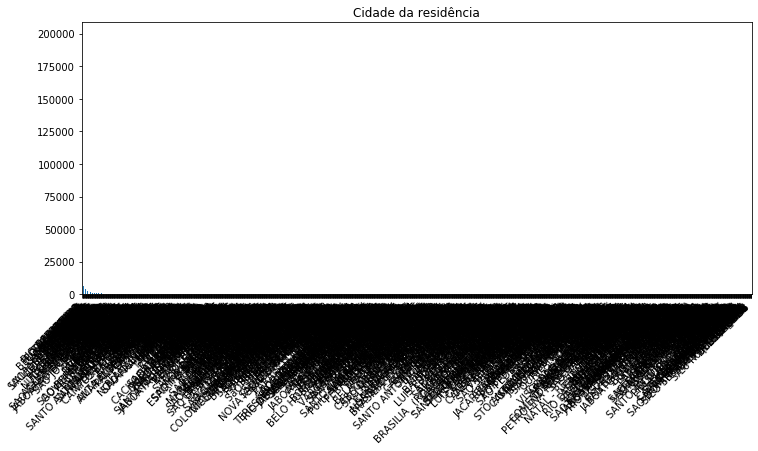

In [19]:
plot_col(df_DAS,'Cidade da residência')